In [2]:
from handler import Session
from leg import Leg
from datetime import datetime
from datetime import date
from datetime import time
import matplotlib.pyplot as plt
import matplotlib.dates as mpldates

session = Session()

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001DD60191358>, 'id': 48192, 'airline': 'Aer Lingus', 'request_time': datetime.datetime(2018, 1, 15, 11, 27, 55), 'arrival_location': 'DUB', 'price': 32.99, 'duration': datetime.timedelta(0, 4800), 'departure_date': datetime.datetime(2018, 1, 29, 19, 15), 'departure_location': 'LGW'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001DD6019A160>, 'id': 48637, 'airline': 'Aer Lingus', 'request_time': datetime.datetime(2018, 1, 15, 11, 45, 8), 'arrival_location': 'DUB', 'price': 32.99, 'duration': datetime.timedelta(0, 4800), 'departure_date': datetime.datetime(2018, 3, 22, 19, 15), 'departure_location': 'LGW'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001DD601E2160>, 'id': 52295, 'airline': 'Aer Lingus', 'request_time': datetime.datetime(2018, 1, 15, 14, 14, 36), 'arrival_location': 'DUB', 'price': 32.99, 'duration': datetime.timedelta(0, 4800), 'departure_

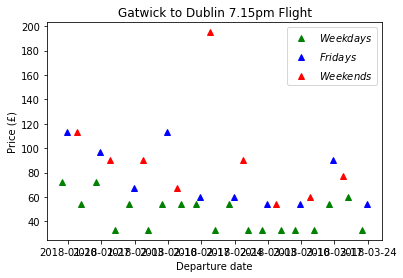

In [3]:
l = session.query(Leg).\
    filter(Leg.departure_location == 'LGW').\
    filter(Leg.arrival_location == 'DUB').\
    filter(Leg.airline == 'Aer Lingus').\
    filter(Leg.request_time >= datetime(2018,1,15,0,0,0)).\
    filter(Leg.request_time < datetime(2018, 1, 16, 0, 0, 0))

same = [leg for leg in l if leg.departure_date.time() == time(19, 15)]

weekdays = [d for d in same if d.departure_date.isoweekday() in range(1,5)]
friday = [d for d in same if d.departure_date.isoweekday() == 5]
weekends = [d for d in same if d.departure_date.isoweekday() in (6,7)]

def prices(lst):
    return ([mpldates.date2num(d.departure_date) for d in lst], [d.price for d in lst])

for fl in weekdays:
    if fl.price < 40:
        print(fl)

plt.plot_date(prices(weekdays)[0], prices(weekdays)[1], 'g^', label='$Weekdays$')
plt.plot_date(prices(friday)[0], prices(friday)[1], 'b^', label='$Fridays$')
plt.plot_date(prices(weekends)[0], prices(weekends)[1], 'r^', label='$Weekends$')
plt.ylabel('Price (£)')
plt.xlabel('Departure date')
plt.title('Gatwick to Dublin 7.15pm Flight')
plt.legend()
plt.show()